In [184]:
import pandas as pd

connectivity_file = '/content/School-Age-Digital-Connectivity.xlsx'
literacy_file = '/content/Literacy-rate_2021-1.xlsx'

connectivity_dfs = pd.read_excel(connectivity_file, sheet_name=None, usecols = "B:F", skiprows=[1])
literacy_dfs = pd.read_excel(literacy_file, sheet_name=None, usecols = "B:F", skiprows=[1])

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [185]:
#pick spreadsheet with total school age data
total_school_age = connectivity_dfs['Total school age'].sort_values('Total', ascending=False)

#pick records from Africa
ssa_school_age = total_school_age[total_school_age['Region']=='SSA']

In [187]:
#pick spreadsheet with youth literacy data
youth_literacy = literacy_dfs['Youth literacy rate, aged 15-24']

#pick records from Africa
ssa_youth_literacy = youth_literacy[youth_literacy['Region']=='SSA'].reset_index(drop=True)
ssa_youth_literacy.dropna(inplace=True)

#convert percent values to decimal
ssa_youth_literacy['Total'] = ssa_youth_literacy['Total']/100

In [188]:
#merge the two datasets
data = ssa_youth_literacy[['Countries and areas','Total']].merge(ssa_school_age[['Countries and areas','Total']], 
                                                                 on='Countries and areas', suffixes=('_literacy', '_connectivity'))
data

,Countries and areas,Total_literacy,Total_connectivity
0,Benin,0.609481,0.035497
1,Burkina Faso,0.582900,0.013710
2,Cameroon,0.850800,0.046586
3,Central African Republic,0.382687,0.038162
4,Côte d'Ivoire,0.584202,0.027739
5,Ghana,0.924910,0.170109
6,Kenya,0.878300,0.319000
7,Madagascar,0.811984,0.105841
8,Mali,0.501347,0.053766
9,Namibia,0.951649,0.067161


Text(0, 0.5, 'Percent of Literate Youth(15-24)')

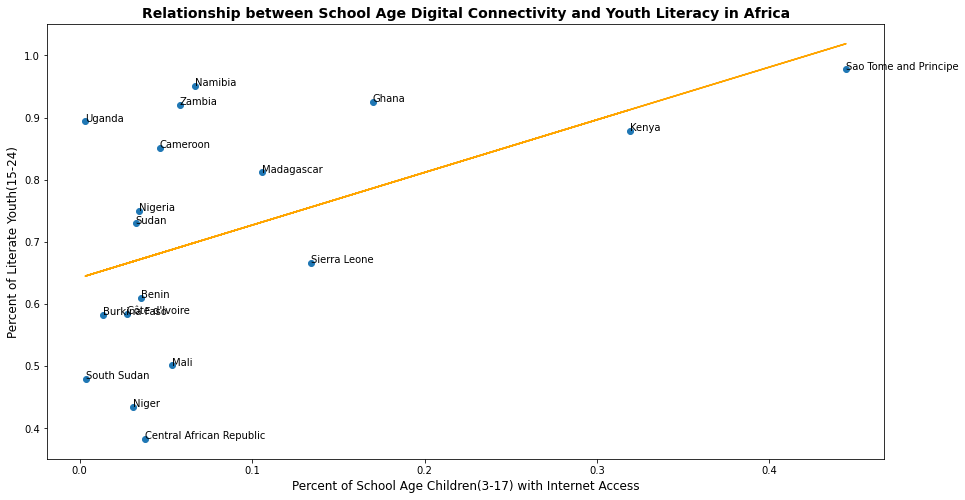

In [197]:
import numpy as np
import matplotlib.pyplot as plt

# open figure + axis
fig, ax = plt.subplots()

#set figure size
fig.set_size_inches(15,8)

#make scatter plot
ax.scatter(x=data['Total_connectivity'],y=data['Total_literacy'])

#annotate data points
for idx, row in data.iterrows():
    ax.annotate(row['Countries and areas'], (row['Total_connectivity'], row['Total_literacy']) )

#run regression on data and plot regression line
coeff, const = np.polyfit(data['Total_connectivity'], data['Total_literacy'], 1)
ax.plot(data['Total_connectivity'], coeff*data['Total_connectivity'] + const, color='orange')

title = 'Relationship between School Age Digital Connectivity and Youth Literacy in Africa'
ax.set_title(title, size=14, fontweight="bold")
ax.set_xlabel('Percent of School Age Children(3-17) with Internet Access', size=12)
ax.set_ylabel('Percent of Literate Youth(15-24)', size=12)